# EDA

## Descriptive statistics

In [47]:
import pandas as pd
import statistics
import numpy as np

array_ = np.array([80, 83, 87, 92, 95, 98])
print('mean:', statistics.mean(array_))
print('median:', statistics.median(array_))
print('median_low:', statistics.median_low(array_))
print('median_high:', statistics.median_high(array_))

df = pd.read_csv('data/wine_cleared.csv')
print('mode:', statistics.mode(df['province']))  # Raise error if more than one
print('mode:', statistics.mode(df['province']))  # Return list if more than one

mean: 89
median: 89.5
median_low: 87
median_high: 92
mode: California
mode: California


## Multivariate analysis (Correlation)

Correlation coefficient | Correlation strength
---|---
-/+ (0 to 0.3) | Weak
-/+ (0.3 to 0.5) | Moderate
-/+ (0.5 to 0.7) | Strong
-/+ (0.7 to 1) | Very strong (***multicollinearity***)

In [50]:
import pandas as pd

df = pd.read_csv('data/wine_cleared.csv')

# For normal (Gaussian) distribution numeric features
df.corr(method='pearson')

,points,price
points,1.0000,0.4111
price,0.4111,1.0000


In [57]:
# For non-Gaussian and categorical features
df.corr(method='spearman')

,points,price
points,1.000000,0.580658
price,0.580658,1.000000


In [60]:
# For non-Gaussian and categorical features FOR NON-cleaned data
df.corr(method='kendall')

,points,price
points,1.000000,0.433066
price,0.433066,1.000000


In [61]:
from sklearn.metrics import matthews_corrcoef

# For boolean features (boolean is still categorical)
x = [+1, -1, +1, +1]
y = [+1, +1, +1, -1] 
matthews_corrcoef(x, y)

-0.3333333333333333

Пары признаков с корреляцией больше 0.3:
    price--points: корреляция 0.41
    points--price: корреляция 0.41
Визуализация всех корреляций:


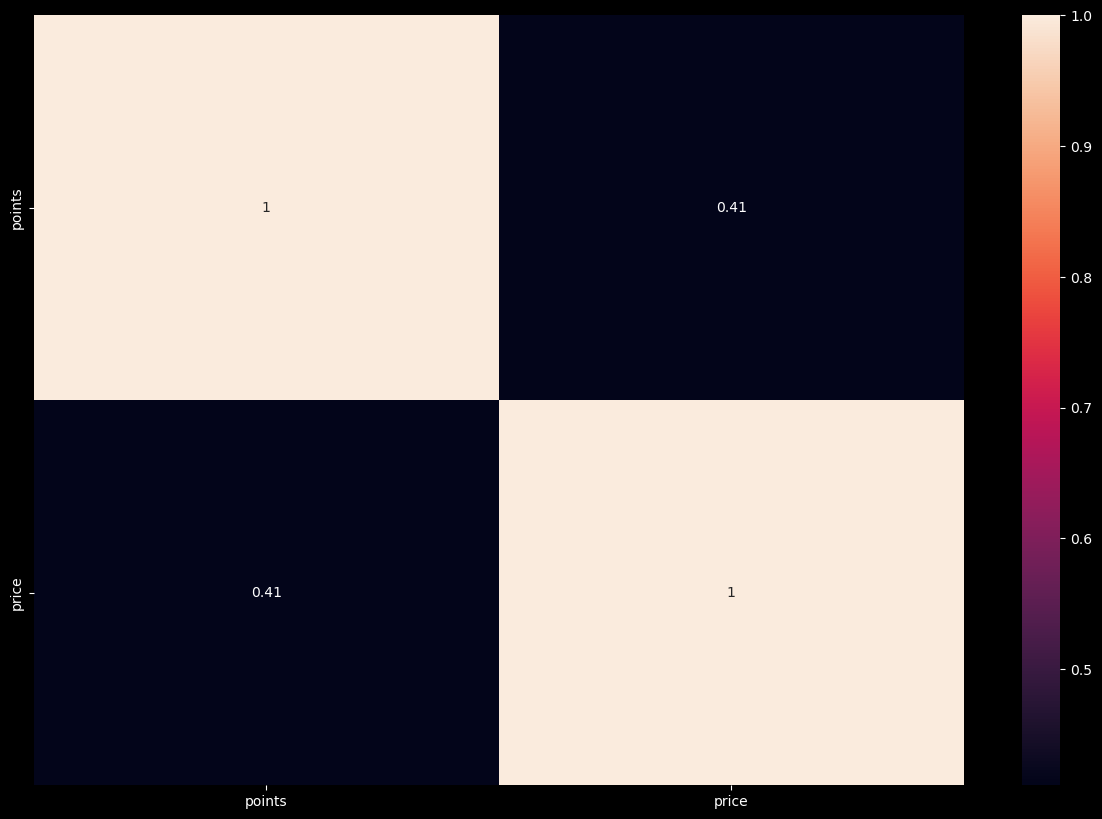

In [100]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/wine_cleared.csv')

def get_correlation(
    df: pd.DataFrame, cols_list: str, method='pearson', 
    multicorr_edge=0.7, heatmap=False):
    """_summary_

    Args:
        df (pd.DataFrame): _description_
        cols_list (str): _description_
        method (str, optional): _description_. Defaults to 'pearson'.
        multicorr_edge (float, optional): _description_. Defaults to 0.7.
        heatmap (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """    
    
    df_corr = df[cols_list].corr(method=method)
    multicoll_cols = []
    annot=True
    
    # проход по значениям таблицы
    for col in df_corr.columns:
        for i in range(len(df_corr)):
            if df_corr[col][i] == 1:
                continue
            elif df_corr[col][i] < -multicorr_edge or df_corr[col][i] > multicorr_edge:
                corr = round(df_corr[col][i], 2)
                multicoll_cols.append(f'{df_corr.index[i]}--{col}: корреляция {corr}')

    print(f'Пары признаков с корреляцией больше {multicorr_edge}:')
    if multicoll_cols:
        for corr in multicoll_cols:
            print(f'    {corr}')
    else:
        print('    признаков с заданой границой КК не найдено')

    # читаемость графика
    if len(cols_list) > 15:
        annot=False

    if heatmap:
        if len(df_corr) > 0:
            print('Визуализация всех корреляций:')
            return sns.heatmap(df_corr, annot=annot)


num_cols = df.select_dtypes('number').columns
cat_cols = [col for col in df.columns if col not in num_cols]

get_correlation(df, num_cols, multicorr_edge=0.3, heatmap=True);